# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [0]:
# !!pip uninstall tensorflow
# !pip install tensorflow==2.0.0

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re

## Get Required Files from Drive

In [42]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
#Set your project path 
project_path =  '/content/drive/My Drive/Colab Notebooks/DataSets/SarcasmData'

In [0]:
import os
os.chdir(project_path)

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [45]:
# dataPath = project_path + 
dfSarcasmDataset = pd.read_json('Sarcasm_Headlines_Dataset.json', lines = True)
dfSarcasmDataset.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [46]:
dfSarcasm = dfSarcasmDataset.drop(columns='article_link', axis=1)
dfSarcasm.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


Text(0.5, 1.0, 'Sarcasm vs Non-sarcasm')

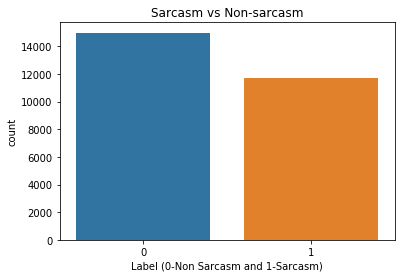

In [47]:
sns.countplot(dfSarcasm.is_sarcastic)
plt.xlabel('Label (0-Non Sarcasm and 1-Sarcasm)')
plt.title('Sarcasm vs Non-sarcasm')

In [0]:
# clean headlines

dfSarcasm['headline'] = dfSarcasm['headline'].apply(lambda x: x.lower())
dfSarcasm['headline'] = dfSarcasm['headline'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [51]:
max_length = dfSarcasm.headline.map(lambda x: len(x)).max()
max_length

237

In [52]:
dfSarcasm.shape

(26709, 2)

#**## Modelling**

## Import required modules required for modelling.

In [0]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D, SpatialDropout1D
# from tensorflow.keras.layers import CuDNNGRU, SpatialDropout1D
from tensorflow.keras.models import Model, Sequential
from keras.callbacks import EarlyStopping

# Set Different Parameters for the model. ( 2 marks)

In [0]:
max_features = 10000
maxlen = 25 # max_length        ## Add your max length here ##
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [0]:
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(dfSarcasm['headline'].values)

# Define X and y for your model.

In [55]:
sequences = tokenizer.texts_to_sequences(dfSarcasm['headline'].values)
X = pad_sequences(sequences, maxlen = maxlen)

print(dfSarcasm['headline'][2])
print(sequences[2])
print(X[2])
print(X.shape)

# Y = dfSarcasm['is_sarcastic'].values
Y = pd.get_dummies(dfSarcasm['is_sarcastic']).values

print(len(X))
print(len(Y))

mom starting to fear sons web series closest thing she will have to grandchild
[139, 817, 1, 796, 1094, 2046, 569, 4632, 198, 138, 38, 45, 1]
[   0    0    0    0    0    0    0    0    0    0    0    0  139  817
    1  796 1094 2046  569 4632  198  138   38   45    1]
(26709, 25)
26709
26709


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 20)


In [57]:
X.shape

(26709, 25)

In [59]:
Y.shape

(26709, 2)

## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [60]:
word_index = tokenizer.word_index
print(len(word_index))

28398


#**## Word Embedding**

## Get Glove Word Embeddings

In [0]:
glove_file = "glove.6B.zip"

In [0]:
#Extract Glove embedding zip file

# commented because the file is already extracted

# from zipfile import ZipFile
# with ZipFile(glove_file, 'r') as z:
#   z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [0]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd


In [62]:
all_emb = np.stack(embeddings.values())

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [63]:
all_emb.shape

(400000, 200)

# Create a weight matrix for words in training docs

In [0]:
num_words = min(max_features, len(word_index))
embed_dim = all_embs.shape[1]

embedding_matrix = np.zeros((num_words, embed_dim))

for word, i in word_index.items():
    if i>= max_features:
        continue
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [79]:
model = Sequential()
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.7))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
# model.add(SpatialDropout1D(0.4))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

# model = Sequential()
# model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix], input_length = X.shape[1]))
# model.add(Bidirectional(LSTM(196, return_sequences=True)))
# model.add(SpatialDropout1D(0.4))
# model.add(Dense(2,activation='softmax'))
# model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 200)         2000000   
_________________________________________________________________
bidirectional_14 (Bidirectio (None, None, 256)         336896    
_________________________________________________________________
dropout_21 (Dropout)         (None, None, 256)         0         
_________________________________________________________________
bidirectional_15 (Bidirectio (None, None, 128)         164352    
_________________________________________________________________
dropout_22 (Dropout)         (None, None, 128)         0         
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 128)               0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)             

In [0]:
from keras import optimizers
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [81]:
batch_size = 100
epochs = 5

## Add your code here ##
early = EarlyStopping(monitor="val_loss", mode="min", patience=1)
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

Train on 14956 samples, validate on 3740 samples
Epoch 1/5
14956/14956 [==============================] - 28s 2ms/sample - loss: 0.5378 - acc: 0.7176 - val_loss: 0.4306 - val_acc: 0.8291
Epoch 2/5
14956/14956 [==============================] - 25s 2ms/sample - loss: 0.3160 - acc: 0.8720 - val_loss: 0.3708 - val_acc: 0.8479
Epoch 3/5
14956/14956 [==============================] - 25s 2ms/sample - loss: 0.2114 - acc: 0.9194 - val_loss: 0.3268 - val_acc: 0.8591
Epoch 4/5
14956/14956 [==============================] - 25s 2ms/sample - loss: 0.1448 - acc: 0.9488 - val_loss: 0.3303 - val_acc: 0.8604
Epoch 5/5
14956/14956 [==============================] - 24s 2ms/sample - loss: 0.0959 - acc: 0.9674 - val_loss: 0.3519 - val_acc: 0.8586


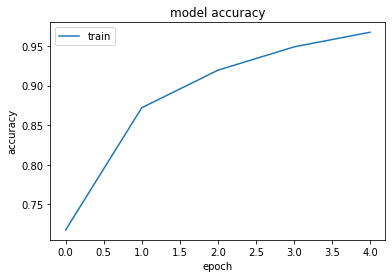

In [84]:
# summarize history for accuracy
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

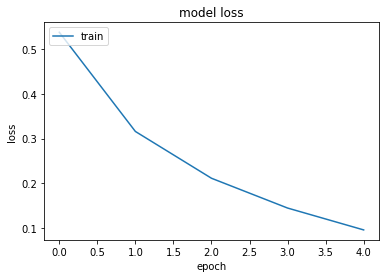

In [85]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [82]:
res = model.evaluate(X_test, Y_test)
print('Test Set \n Loss: {:0.3f} \n Accuracy: {:0.3f}'.format(res[0], res[1]))

8013/8013 [==============================] - 9s 1ms/sample - loss: 0.3548 - acc: 0.8581
Test Set 
 Loss: 0.355 
 Accuracy: 0.858


## Summary 

### Training Accuracy = 96%, Validation Accruacy = 86%

### Test Accuracy = 86%

## Try some random text and see to which category that text falls and by what %

In [83]:
headline = ['hey there whatsapp is using me']
headline = tokenizer.texts_to_sequences(headline)
headline = pad_sequences(headline, maxlen=maxlen, dtype='int32', value=0)

sentiment = model.predict(headline,batch_size=1,verbose = 2)[0]
print(sentiment)
if(np.argmax(sentiment) == 0):
    print("Non-sarcastic")
elif (np.argmax(sentiment) == 1):
    print("Sarcasm")

1/1 - 1s
[0.97822946 0.02177054]
Non-sarcastic
